# Pedicting the number of EV chargers that a county should have based on given socio-economic features

# Program Initialization Section

Import packages and read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/blihardinata/Python_Portfolio/main/EV_Station/ML_dataset.csv')
df.head()

,FIP,Area_Name,State,State.1,County State,POP_ESTIMATE_2019,Median_Household_Income_2019,avg_commute_time_by_state,Median Real Estate,Married-couple family!!Householder 15 to 34 years,Married-couple family!!Householder 35 to 64 years,Married-couple family!!Householder 65 years and over,Total Number of EV charger BASED ON FIP or County,Regular Gasoline By State,Regular Diesel By State,AVG_electric_price (cents/kWh)_by_state,State Sales Tax Rate,states_sales_tax_ratio,Food Environment Index,%of physically inactive,physical inactivity rate,Annual Average Violent Crimes,Violent Crime Rate,# Workers who Drive Alone,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,1001,Autauga County,AL,Alabama,Autauga County Alabama,55869,58233.0,24.9,160200.0,1979.0,7205.0,2425.0,0,2.64,2.872,9.83,4.0,0.04,6.7,30.6,0.306,148.5,272.282220,24635,89.3,97.4,71.5,103.3,88.6,90.8
1,1003,Baldwin County,AL,Alabama,Baldwin County Alabama,223234,59871.0,24.9,231100.0,5258.0,24656.0,12972.0,0,2.64,2.872,9.83,4.0,0.04,7.8,24.7,0.247,408.0,203.660396,93141,89.3,97.4,71.5,103.3,88.6,90.8
2,1005,Barbour County,AL,Alabama,Barbour County Alabama,24686,35972.0,24.9,94000.0,528.0,2164.0,1266.0,0,2.64,2.872,9.83,4.0,0.04,5.5,28.0,0.280,105.5,414.277861,8231,89.3,97.4,71.5,103.3,88.6,90.8
3,1007,Bibb County,AL,Alabama,Bibb County Alabama,22394,47918.0,24.9,97200.0,389.0,2269.0,835.0,0,2.64,2.872,9.83,4.0,0.04,7.6,33.4,0.334,19.5,89.349126,8167,89.3,97.4,71.5,103.3,88.6,90.8
4,1009,Blount County,AL,Alabama,Blount County Alabama,57826,52902.0,24.9,133800.0,1692.0,7309.0,2908.0,0,2.64,2.872,9.83,4.0,0.04,7.9,33.3,0.333,279.0,482.690611,21690,89.3,97.4,71.5,103.3,88.6,90.8


# Initial Data Investigation Section

## Descriptive Analytics

In [ ]:
df.head(4)

,FIP,Area_Name,State,State.1,County State,POP_ESTIMATE_2019,Median_Household_Income_2019,avg_commute_time_by_state,Median Real Estate,Married-couple family!!Householder 15 to 34 years,Married-couple family!!Householder 35 to 64 years,Married-couple family!!Householder 65 years and over,Total Number of EV charger BASED ON FIP or County,Regular Gasoline By State,Regular Diesel By State,AVG_electric_price (cents/kWh)_by_state,State Sales Tax Rate,states_sales_tax_ratio,Food Environment Index,%of physically inactive,physical inactivity rate,Annual Average Violent Crimes,Violent Crime Rate,# Workers who Drive Alone,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,1001,Autauga County,AL,Alabama,Autauga County Alabama,55869,58233.0,24.9,160200.0,1979.0,7205.0,2425.0,0,2.64,2.872,9.83,4.0,0.04,6.7,30.6,0.306,148.5,272.282220,24635,89.3,97.4,71.5,103.3,88.6,90.8
1,1003,Baldwin County,AL,Alabama,Baldwin County Alabama,223234,59871.0,24.9,231100.0,5258.0,24656.0,12972.0,0,2.64,2.872,9.83,4.0,0.04,7.8,24.7,0.247,408.0,203.660396,93141,89.3,97.4,71.5,103.3,88.6,90.8
2,1005,Barbour County,AL,Alabama,Barbour County Alabama,24686,35972.0,24.9,94000.0,528.0,2164.0,1266.0,0,2.64,2.872,9.83,4.0,0.04,5.5,28.0,0.280,105.5,414.277861,8231,89.3,97.4,71.5,103.3,88.6,90.8
3,1007,Bibb County,AL,Alabama,Bibb County Alabama,22394,47918.0,24.9,97200.0,389.0,2269.0,835.0,0,2.64,2.872,9.83,4.0,0.04,7.6,33.4,0.334,19.5,89.349126,8167,89.3,97.4,71.5,103.3,88.6,90.8


In [ ]:
df.tail(4)

,FIP,Area_Name,State,State.1,County State,POP_ESTIMATE_2019,Median_Household_Income_2019,avg_commute_time_by_state,Median Real Estate,Married-couple family!!Householder 15 to 34 years,Married-couple family!!Householder 35 to 64 years,Married-couple family!!Householder 65 years and over,Total Number of EV charger BASED ON FIP or County,Regular Gasoline By State,Regular Diesel By State,AVG_electric_price (cents/kWh)_by_state,State Sales Tax Rate,states_sales_tax_ratio,Food Environment Index,%of physically inactive,physical inactivity rate,Annual Average Violent Crimes,Violent Crime Rate,# Workers who Drive Alone,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
3208,72147,Vieques Municipio,PR,Puerto Rico,Vieques Municipio Puerto Rico,8386,NaN,29.3,NaN,61.0,329.0,287.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3209,72149,Villalba Municipio,PR,Puerto Rico,Villalba Municipio Puerto Rico,21372,NaN,29.3,NaN,134.0,1935.0,905.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3210,72151,Yabucoa Municipio,PR,Puerto Rico,Yabucoa Municipio Puerto Rico,32282,NaN,29.3,NaN,115.0,2279.0,1578.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3211,72153,Yauco Municipio,PR,Puerto Rico,Yauco Municipio Puerto Rico,33575,NaN,29.3,NaN,228.0,2699.0,1674.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FIP                                                   3212 non-null   int64  
 1   Area_Name                                             3212 non-null   object 
 2   State                                                 3212 non-null   object 
 3   State.1                                               3212 non-null   object 
 4   County State                                          3212 non-null   object 
 5   POP_ESTIMATE_2019                                     3212 non-null   int64  
 6   Median_Household_Income_2019                          3133 non-null   float64
 7   avg_commute_time_by_state                             3212 non-null   float64
 8   Median Real Estate                                    3109

In [ ]:
df.shape

(3212, 30)

In [ ]:
df.describe()

,FIP,POP_ESTIMATE_2019,Median_Household_Income_2019,avg_commute_time_by_state,Median Real Estate,Married-couple family!!Householder 15 to 34 years,Married-couple family!!Householder 35 to 64 years,Married-couple family!!Householder 65 years and over,Total Number of EV charger BASED ON FIP or County,Regular Gasoline By State,Regular Diesel By State,AVG_electric_price (cents/kWh)_by_state,State Sales Tax Rate,states_sales_tax_ratio,Food Environment Index,%of physically inactive,physical inactivity rate,Annual Average Violent Crimes,Violent Crime Rate,# Workers who Drive Alone,costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
count,3212.000000,3.212000e+03,3133.00000,3212.000000,3.109000e+03,3210.000000,3.210000e+03,3210.000000,3212.00000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000
mean,31358.442403,1.062264e+05,55742.35557,24.695548,1.646951e+05,2597.014953,1.139151e+04,4252.632087,13.42746,2.781242,3.021798,9.941640,5.378354,0.053784,7.218088,25.248537,0.252485,374.764944,230.838961,4.748800e+04,97.352010,98.476835,94.181685,97.834046,98.493810,99.142470
std,16298.223866,3.652077e+05,14506.32413,3.713022,1.065870e+05,7649.734825,3.482659e+04,11124.617426,62.24140,0.229159,0.203987,2.209057,1.522213,0.015222,1.710449,7.844829,0.078448,1706.388969,197.211424,1.580483e+05,14.142405,8.494319,33.585910,9.544382,12.035644,9.082179
min,1001.000000,8.600000e+01,24732.00000,17.200000,2.640000e+04,0.000000,7.000000e+00,2.000000,0.00000,2.576000,2.753000,7.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,86.100000,88.900000,70.100000,82.900000,83.600000,85.600000
25%,19028.500000,1.113025e+04,46255.00000,22.200000,1.011000e+05,273.250000,1.260750e+03,610.000000,0.00000,2.640000,2.908000,8.780000,4.500000,0.045000,6.800000,21.775000,0.217750,10.000000,97.156029,4.189250e+03,89.200000,92.900000,73.900000,91.800000,91.400000,94.200000
50%,30016.000000,2.611300e+04,53341.00000,24.800000,1.343000e+05,660.500000,2.928500e+03,1325.500000,2.00000,2.708000,3.007000,9.560000,6.000000,0.060000,7.600000,25.900000,0.259000,46.750000,184.964416,1.030050e+04,91.500000,96.600000,85.100000,97.300000,94.300000,97.600000
75%,46105.500000,6.731450e+04,62108.00000,27.200000,1.899000e+05,1804.000000,7.589250e+03,3369.500000,6.00000,2.831000,3.082000,10.020000,6.250000,0.062500,8.200000,30.200000,0.302000,166.000000,318.552035,2.880675e+04,99.800000,102.500000,95.400000,102.300000,100.900000,100.100000
max,72153.000000,1.003911e+07,151806.00000,33.600000,1.176700e+06,180853.000000,1.017460e+06,297345.000000,1904.00000,3.936000,4.190000,28.720000,7.250000,0.072500,10.000000,50.400000,0.504000,49548.500000,1819.514407,4.811408e+06,192.900000,169.300000,318.600000,172.700000,148.600000,150.900000


Data cleaning
ref: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d


In [ ]:
#Check the missing value
df.isnull().sum()

FIP                                                       0
Area_Name                                                 0
State                                                     0
State.1                                                   0
County State                                              0
POP_ESTIMATE_2019                                         0
Median_Household_Income_2019                             79
avg_commute_time_by_state                                 0
Median Real Estate                                      103
Married-couple family!!Householder 15 to 34 years         2
Married-couple family!!Householder 35 to 64 years         2
Married-couple family!!Householder 65 years and over      2
Total Number of EV charger BASED ON FIP or County         0
Regular Gasoline By State                                78
Regular Diesel By State                                  78
AVG_electric_price (cents/kWh)_by_state                  78
State Sales Tax Rate                    

In [ ]:
# Drop Puerto Rico from Dataset
df = df.loc[df.State != 'PR']

In [ ]:
#Check null value again
df.isnull().sum()

FIP                                                      0
Area_Name                                                0
State                                                    0
State.1                                                  0
County State                                             0
POP_ESTIMATE_2019                                        0
Median_Household_Income_2019                             1
avg_commute_time_by_state                                0
Median Real Estate                                      25
Married-couple family!!Householder 15 to 34 years        2
Married-couple family!!Householder 35 to 64 years        2
Married-couple family!!Householder 65 years and over     2
Total Number of EV charger BASED ON FIP or County        0
Regular Gasoline By State                                0
Regular Diesel By State                                  0
AVG_electric_price (cents/kWh)_by_state                  0
State Sales Tax Rate                                    

In [ ]:
#fill the missing median real estate with median
df['Median Real Estate'] = df['Median Real Estate'].fillna(df.groupby('State')['Median Real Estate'].transform('median'))

In [ ]:
df['Median_Household_Income_2019'] = df['Median_Household_Income_2019'].fillna(df.groupby('State')['Median_Household_Income_2019'].transform('median'))

In [ ]:
# Drop two missing value in 'Married-couple family!!Householder 35 to 64 years'
df.dropna(subset=['Married-couple family!!Householder 35 to 64 years'], inplace= True)

In [ ]:
df.isnull().sum()

FIP                                                     0
Area_Name                                               0
State                                                   0
State.1                                                 0
County State                                            0
POP_ESTIMATE_2019                                       0
Median_Household_Income_2019                            0
avg_commute_time_by_state                               0
Median Real Estate                                      0
Married-couple family!!Householder 15 to 34 years       0
Married-couple family!!Householder 35 to 64 years       0
Married-couple family!!Householder 65 years and over    0
Total Number of EV charger BASED ON FIP or County       0
Regular Gasoline By State                               0
Regular Diesel By State                                 0
AVG_electric_price (cents/kWh)_by_state                 0
State Sales Tax Rate                                    0
states_sales_t

In [ ]:
# Change the column names
df = df.rename(columns = {
                    'State.1' : 'State_Name',
                    'POP_ESTIMATE_2019' : 'Population',
                    'Median_Household_Income_2019' : 'Median_Household_Income',
                    'avg_commute_time_by_state' : 'Avg_Commute_Time',
                    'Median Real Estate' : 'Median_Real_Estate',
                    'Married-couple family!!Householder 15 to 34 years' : 'Married_15_34',
                    'Married-couple family!!Householder 35 to 64 years' : 'Married_35_64',
                    'Married-couple family!!Householder 65 years and over' : 'Married_64',
                    'Total Number of EV charger BASED ON FIP or County' : 'EV_Number',
                    'Regular Gasoline By State' : 'Gas_Price',
                    'Regular Diesel By State' : 'Diesel_Price',
                    'AVG_electric_price (cents/kWh)_by_state' : 'Avg_Electric_Price',
                    'State Sales Tax Rate' : 'Sales_Tax',
                    'states_sales_tax_ratio' : 'Sales_Tax_Ratio',
                    'Food Environment Index' : 'Food_Environment_Index',
                    '%of physically inactive' : '%of_Physically_Inactive',
                    'physical inactivity rate' : 'Physical_Inactivity_Rate',
                    'Annual Average Violent Crimes' : 'Avg_Violent_Crime',
                    'Violent Crime Rate' : 'Violent_Crime_Rate',
                    '# Workers who Drive Alone' : 'Number_of_Drive_Alone',
                    'costIndex' : 'Cost_Index',
                    'groceryCost' : 'Grocery_Cost',
                    'housingCost' : 'Housing_Cost',
                    'utilitiesCost' : 'Utilities_Cost',
                    'transportationCost' : 'Transportation_Cost',
                    'miscCost' : 'Misc_Cost'
                                })

## Data visualization

In [ ]:
ev = df.loc[:, ['EV_Number']]
ev

,EV_Number
0,0
1,0
2,0
3,0
4,0
...,...
3129,3
3130,28
3131,1
3132,0


In [ ]:
#replace non-zero with a value of 1
ev[ev != 0] = 1
ev

,EV_Number
0,0
1,0
2,0
3,0
4,0
...,...
3129,1
3130,1
3131,1
3132,0


In [ ]:
#https://datatofish.com/integers-to-strings-dataframe/
ev = ev.applymap(str)
ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 0 to 3133
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EV_Number  3132 non-null   object
dtypes: object(1)
memory usage: 48.9+ KB


In [ ]:
#Replace 0 with No and 1 with Yes
ev['EV_Number'] = ev['EV_Number'].map({'0':'No', '1':'Yes'})
ev

,EV_Number
0,No
1,No
2,No
3,No
4,No
...,...
3129,Yes
3130,Yes
3131,Yes
3132,No


In [ ]:
df['ev'] = ev
df.head() 

,FIP,Area_Name,State,State_Name,County State,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Married_64,EV_Number,Gas_Price,Diesel_Price,Avg_Electric_Price,Sales_Tax,Sales_Tax_Ratio,Food_Environment_Index,%of_Physically_Inactive,Physical_Inactivity_Rate,Avg_Violent_Crime,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index,Grocery_Cost,Housing_Cost,Utilities_Cost,Transportation_Cost,Misc_Cost,ev
0,1001,Autauga County,AL,Alabama,Autauga County Alabama,55869,58233.0,24.9,160200.0,1979.0,7205.0,2425.0,0,2.64,2.872,9.83,4.0,0.04,6.7,30.6,0.306,148.5,272.282220,24635,89.3,97.4,71.5,103.3,88.6,90.8,No
1,1003,Baldwin County,AL,Alabama,Baldwin County Alabama,223234,59871.0,24.9,231100.0,5258.0,24656.0,12972.0,0,2.64,2.872,9.83,4.0,0.04,7.8,24.7,0.247,408.0,203.660396,93141,89.3,97.4,71.5,103.3,88.6,90.8,No
2,1005,Barbour County,AL,Alabama,Barbour County Alabama,24686,35972.0,24.9,94000.0,528.0,2164.0,1266.0,0,2.64,2.872,9.83,4.0,0.04,5.5,28.0,0.280,105.5,414.277861,8231,89.3,97.4,71.5,103.3,88.6,90.8,No
3,1007,Bibb County,AL,Alabama,Bibb County Alabama,22394,47918.0,24.9,97200.0,389.0,2269.0,835.0,0,2.64,2.872,9.83,4.0,0.04,7.6,33.4,0.334,19.5,89.349126,8167,89.3,97.4,71.5,103.3,88.6,90.8,No
4,1009,Blount County,AL,Alabama,Blount County Alabama,57826,52902.0,24.9,133800.0,1692.0,7309.0,2908.0,0,2.64,2.872,9.83,4.0,0.04,7.9,33.3,0.333,279.0,482.690611,21690,89.3,97.4,71.5,103.3,88.6,90.8,No


In [ ]:
pplot = df.loc[:, ['State', 'EV_Number', 'Cost_Index', 'Housing_Cost', 'Grocery_Cost', 'Utilities_Cost', 'Transportation_Cost', 'Avg_Commute_Time','ev' ]]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.08, 'Pairplot')

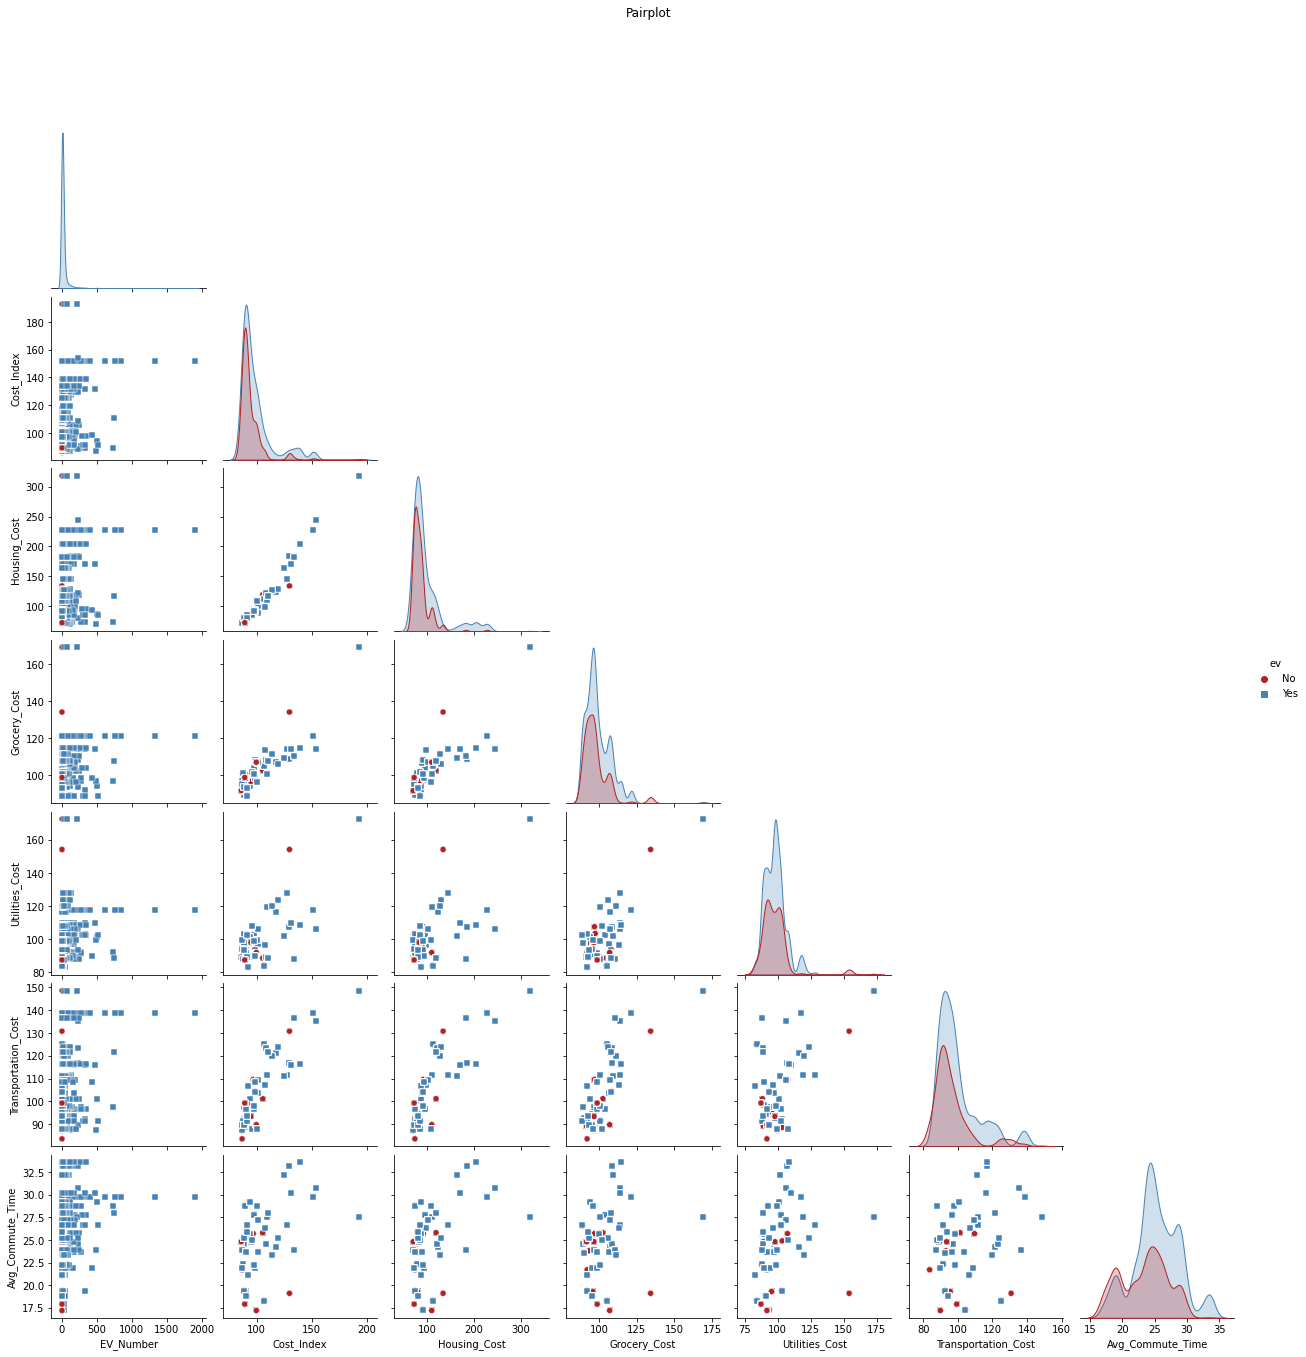

In [ ]:
#corner = True -> to eliminate the redundancy of the top right half of the pairplot
pplot = sns.pairplot(pplot, hue = 'ev', markers=["o", "s"], corner=True, palette=["firebrick", "steelblue"])
pplot.fig.suptitle("Pairplot", y=1.08)

Text(0.5, 1.0, 'Correlation Heatmap')

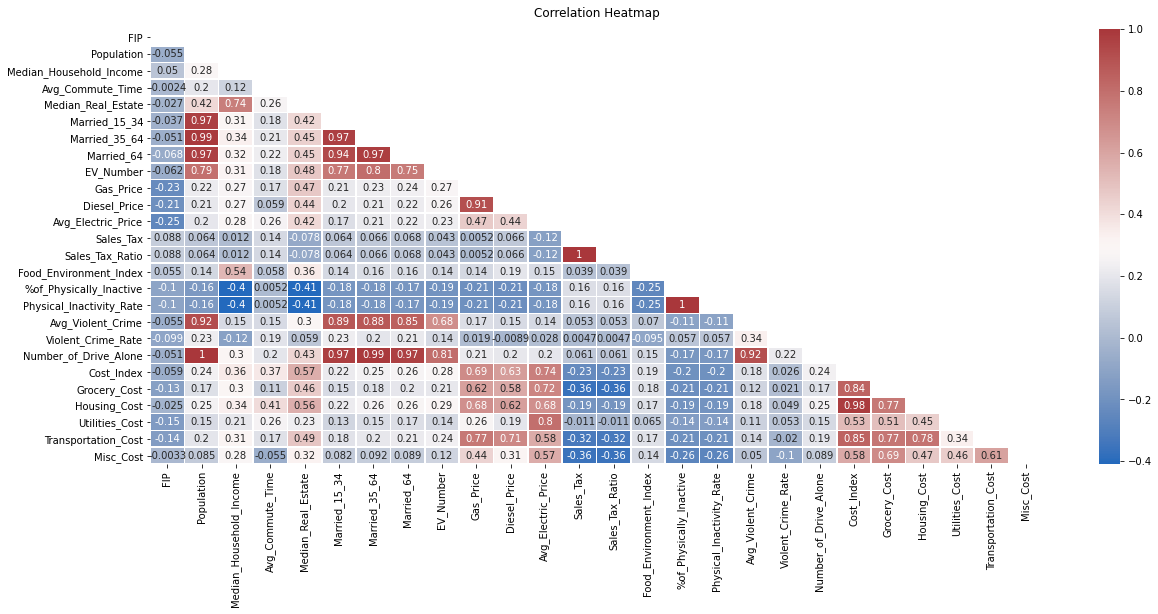

In [ ]:
# Coefficient 

plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap="vlag", linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
df.drop(["Sales_Tax", "%of_Physically_Inactive", "Married_64", "Diesel_Price", "Misc_Cost"], axis = 1, inplace= True)

Divergent Chart

In [ ]:
#Find average for the cost of living
cost_id = df.groupby("State")['Cost_Index'].mean().mean()
cost_id

105.6078431372549

In [ ]:
costid = pd.DataFrame(df.groupby("State")['Cost_Index'].mean())
costid.head()

,Cost_Index
State,
AK,129.9
AL,89.3
AR,86.9
AZ,97.0
CA,151.7


In [ ]:
##cdaa7d = brown
costid['colors'] = ['firebrick' if x < cost_id else 'steelblue' for x in costid['Cost_Index']]
costid.sort_values('Cost_Index', inplace=True)
costid.head()

,Cost_Index,colors
State,,
MS,86.1,firebrick
AR,86.9,firebrick
OK,87.0,firebrick
MO,87.1,firebrick
NM,87.5,firebrick


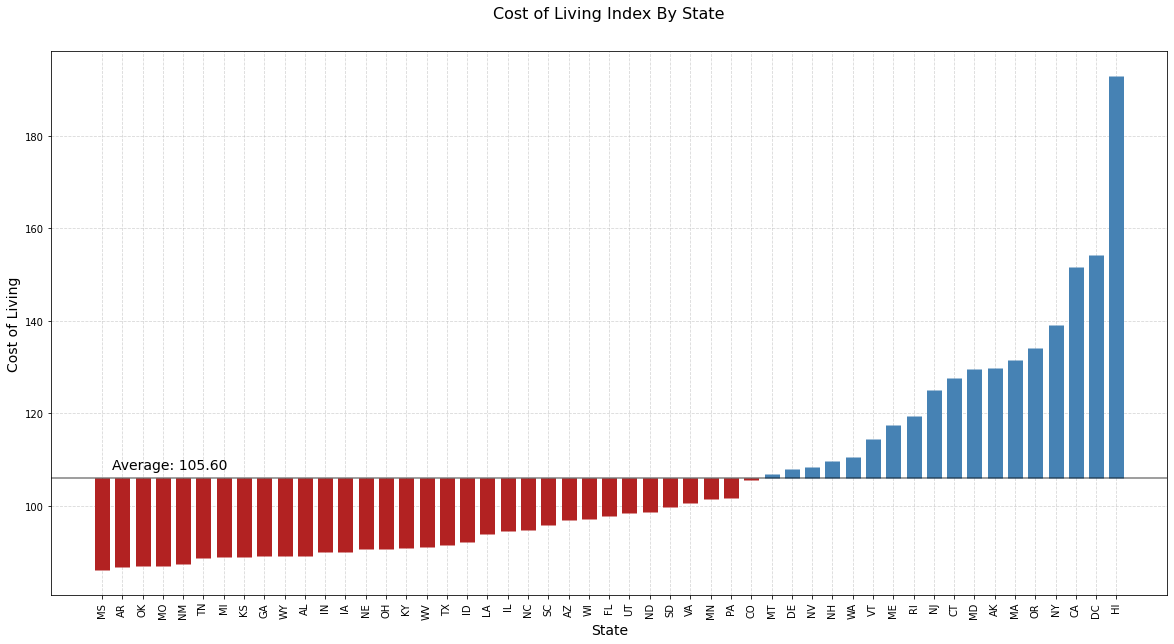

In [ ]:
plt.figure(figsize=(20,10))
#linewidth is to increase bar width
plt.vlines(x=costid.index, ymin=106, ymax=costid['Cost_Index'], color=costid.colors, alpha=1, linewidth=15, linestyles='solid')
plt.xlabel('State', fontsize = 14)
plt.xticks(rotation = 90)
plt.ylabel('Cost of Living', fontsize = 14)
plt.title('Cost of Living Index By State', fontsize = 16, y = 1.05)
#adding horizontal line
plt.axhline(y=106, color='black', linestyle='-', alpha = 0.5)

#Adding text (xcoordinate, ycoordinate, text)
plt.text(0.5, 108, "Average: 105.60", fontsize = 14)

plt.grid(linestyle='--', alpha=0.5)

Average Household Income with tree maps
https://towardsdatascience.com/treemap-basics-with-python-777e5ed173d0

In [ ]:
#Calculate average value of household income
EV_Number = round(df.groupby("State")['EV_Number'].sum().sort_values(), 2)
EV_Number = pd.DataFrame(EV_Number)

In [ ]:
#Arkansas and Arizona have 0 value. Hence, Squarify might give error
EV_Number = EV_Number.drop(index= ['AK', 'AR'])

In [ ]:
EV_Number.sort_values('EV_Number', ascending=False, inplace=True)

In [ ]:
pip install squarify


In [ ]:
import squarify 
import matplotlib

In [ ]:
label = [label for label in zip(EV_Number.index, EV_Number.EV_Number)]
label = pd.Series(label)

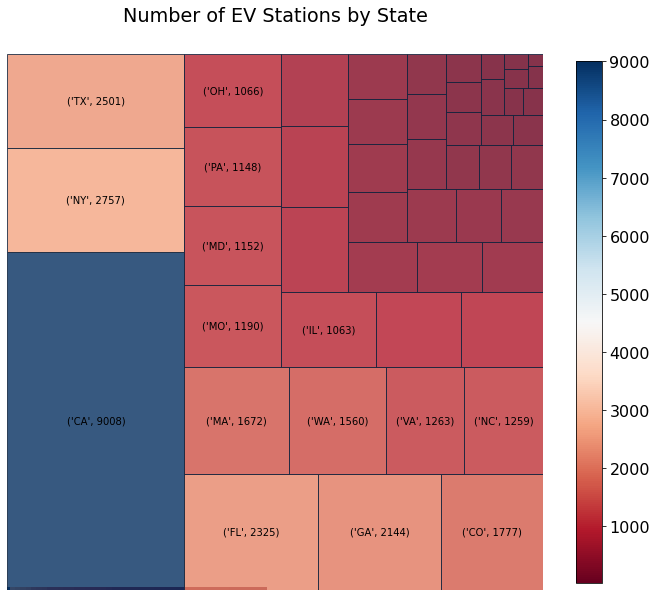

In [ ]:
#building the dimension and space for the plot
#choosing color: https://www.color-hex.com/color-names.html
fig, ax = plt.subplots(1, figsize = (12,12))

cmap = matplotlib.cm.RdBu
min, max = EV_Number.min(), EV_Number.max()
norm = matplotlib.colors.Normalize(vmin=min, vmax=max)
colors = [cmap(norm(value)) for value in EV_Number.EV_Number]
label = [label for label in zip(EV_Number.index, EV_Number.EV_Number)]

squarify.plot(sizes=EV_Number['EV_Number'], label=label[:15], alpha = 0.8, color=colors, edgecolor= '#12253F')
plt.rc('font', size=16) 
# y = to add gap between graph and title
plt.title('Number of EV Stations by State', y = 1.05)
plt.axis('off')

#building colorbar
img = plt.imshow([EV_Number['EV_Number']], cmap=cmap)
fig.colorbar(img, orientation="vertical", shrink=.80)
plt.show()

Scatter Plot

https://www.python-graph-gallery.com/271-custom-your-bubble-plot

https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

https://matplotlib.org/stable/gallery/color/named_colors.html

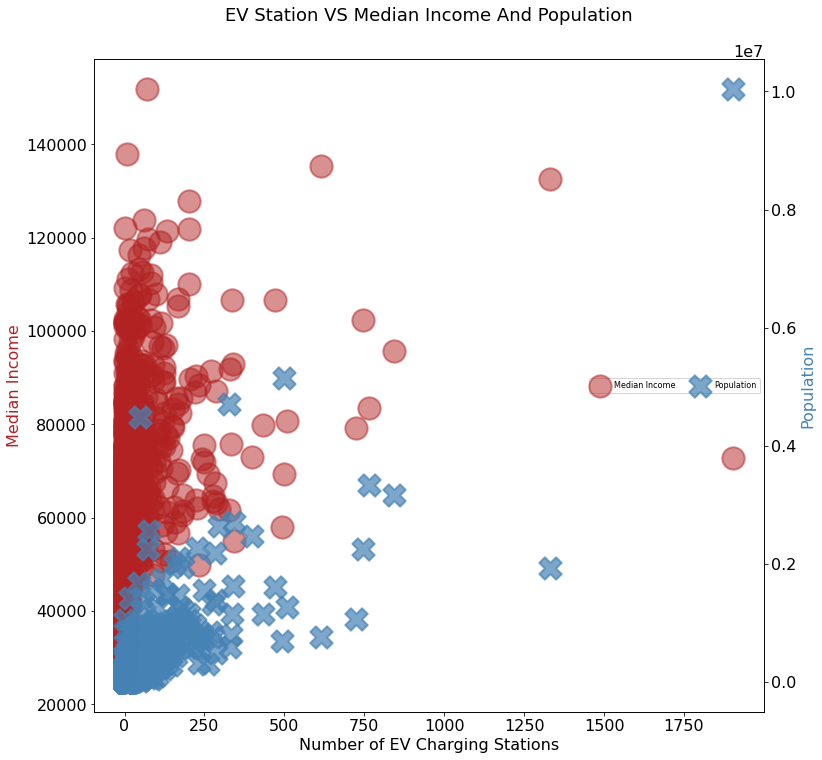

In [ ]:
#scatter plot with twin axis EV number VS household income + population

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (12,12))
# make a plot
income = ax.scatter(df['EV_Number'], df['Median_Household_Income'], color="firebrick", marker="o", s=500, alpha=0.5, linewidth=2)
# set x-axis label
ax.set_xlabel("Number of EV Charging Stations",fontsize=16)
# set y-axis label
ax.set_ylabel("Median Income",color="firebrick",fontsize=16)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
population = ax2.scatter(df['EV_Number'], df['Population'],color="steelblue",marker="X", alpha=0.7, s=500, linewidth=2)
ax2.set_ylabel("Population",color="steelblue",fontsize=16)

plt.legend((income, population), 
           ('Median Income', 'Population'),
           scatterpoints=1,
           loc= 'center right', ncol =5, fontsize = 8)

plt.title('EV Station VS Median Income And Population', y = 1.05, fontsize=18)
plt.show()


# Splitting Dataset into X (Variables) and Y (Target)

In [ ]:
Y = df['EV_Number']
Y = pd.DataFrame(Y)
Y.head()

,EV_Number
0,0
1,0
2,0
3,0
4,0


In [ ]:
X = df.loc[:,['Population', 'Median_Household_Income', 'Avg_Commute_Time', 'Median_Real_Estate',
       'Married_15_34', 'Married_35_64', 'Gas_Price',
       'Avg_Electric_Price', 'Sales_Tax_Ratio', 'Food_Environment_Index',
       'Physical_Inactivity_Rate', 'Avg_Violent_Crime', 'Violent_Crime_Rate',
       'Number_of_Drive_Alone', 'Cost_Index', 'Grocery_Cost', 'Housing_Cost',
       'Utilities_Cost', 'Transportation_Cost']]
X.head()

,Population,Median_Household_Income,Avg_Commute_Time,Median_Real_Estate,Married_15_34,Married_35_64,Gas_Price,Avg_Electric_Price,Sales_Tax_Ratio,Food_Environment_Index,Physical_Inactivity_Rate,Avg_Violent_Crime,Violent_Crime_Rate,Number_of_Drive_Alone,Cost_Index,Grocery_Cost,Housing_Cost,Utilities_Cost,Transportation_Cost
0,55869,58233.0,24.9,160200.0,1979.0,7205.0,2.64,9.83,0.04,6.7,0.306,148.5,272.282220,24635,89.3,97.4,71.5,103.3,88.6
1,223234,59871.0,24.9,231100.0,5258.0,24656.0,2.64,9.83,0.04,7.8,0.247,408.0,203.660396,93141,89.3,97.4,71.5,103.3,88.6
2,24686,35972.0,24.9,94000.0,528.0,2164.0,2.64,9.83,0.04,5.5,0.280,105.5,414.277861,8231,89.3,97.4,71.5,103.3,88.6
3,22394,47918.0,24.9,97200.0,389.0,2269.0,2.64,9.83,0.04,7.6,0.334,19.5,89.349126,8167,89.3,97.4,71.5,103.3,88.6
4,57826,52902.0,24.9,133800.0,1692.0,7309.0,2.64,9.83,0.04,7.9,0.333,279.0,482.690611,21690,89.3,97.4,71.5,103.3,88.6


In [ ]:
#Checking statistical significance
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
mod = sm.OLS(Y, X)
X = sm.add_constant(X)
mod_result = mod.fit()
print(mod_result.summary())

                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              452.2
Date:                Thu, 06 May 2021   Prob (F-statistic):                        0.00
Time:                        06:58:32   Log-Likelihood:                         -15419.
No. Observations:                3132   AIC:                                  3.088e+04
Df Residuals:                    3113   BIC:                                  3.099e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
#create a new dataframe with more dropped columns
dfev = df.copy()

In [ ]:
#keeping cost of living index 
dfev.drop(["County State", "State_Name", "Avg_Electric_Price", "Sales_Tax_Ratio","Food_Environment_Index", "Physical_Inactivity_Rate", "Violent_Crime_Rate",
         "Grocery_Cost", "Housing_Cost", "Utilities_Cost", "Transportation_Cost"], axis = 1, inplace= True)

In [ ]:
#Finalized X value for checking the R2 
X = dfev.loc[:, ['Population', 'Median_Household_Income',
       'Avg_Commute_Time', 'Median_Real_Estate', 'Married_15_34',
       'Married_35_64', 'Gas_Price', 'Avg_Violent_Crime',
       'Number_of_Drive_Alone', 'Cost_Index']]

In [ ]:
mod = sm.OLS(Y, X)
X = sm.add_constant(X)
mod_result = mod.fit()
print(mod_result.summary())
#Keeping married 35_64 as that variable is part of socioeconomic factor in financial stability

                                 OLS Regression Results                                
Dep. Variable:              EV_Number   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              846.4
Date:                Thu, 06 May 2021   Prob (F-statistic):                        0.00
Time:                        06:58:32   Log-Likelihood:                         -15439.
No. Observations:                3132   AIC:                                  3.090e+04
Df Residuals:                    3122   BIC:                                  3.096e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [ ]:
mod = sm.OLS(Y, X)
X = sm.add_constant(X)
mod_result = mod.fit()
y_pred = mod_result.predict(X)
y_pred

0        0.434365
1       17.253112
2       -0.902720
3       -4.349795
4       -5.487232
          ...    
3129     4.550767
3130    62.476122
3131     1.798627
3132     7.645639
3133     5.276137
Length: 3132, dtype: float64

In [ ]:
y_pred.shape

(3132,)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['prediction']
predY = pd.concat((Y, y_pred), axis = 1)
predY.head()

,EV_Number,prediction
0,0,0.434365
1,0,17.253112
2,0,-0.902720
3,0,-4.349795
4,0,-5.487232


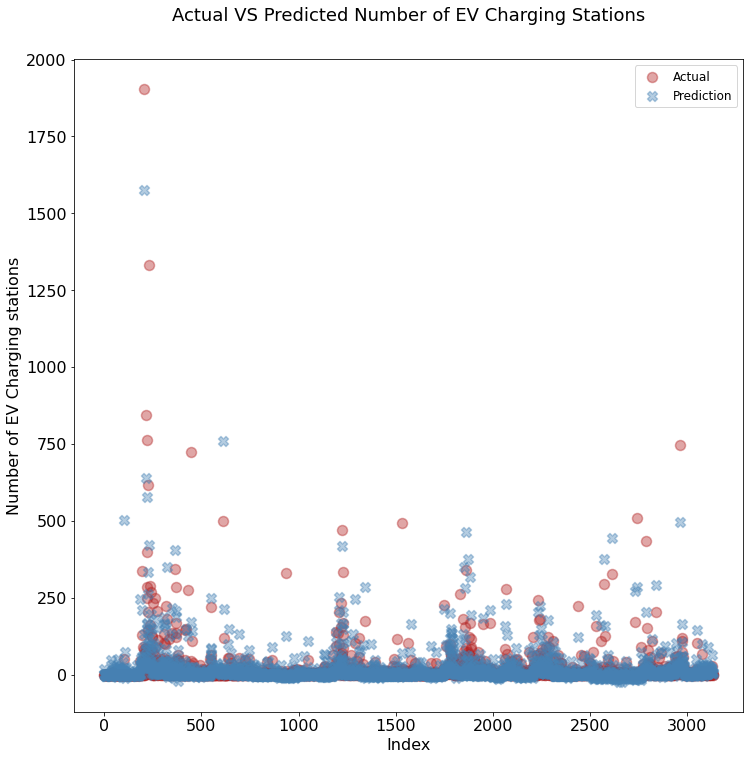

In [ ]:
#Scatter Plot

fig, ax = plt.subplots(figsize = (12,12))
ev = ax.scatter(predY.index, predY['EV_Number'], color = "firebrick", marker = "o", linewidths=1.5, s=100, alpha = 0.4)
pred = ax.scatter(predY.index, predY['prediction'], color = "steelblue", marker = "X", linewidths=1.5, s=100, alpha = 0.4)

ax.set_xlabel("Index",fontsize=16)
ax.set_ylabel("Number of EV Charging stations" , fontsize=16)


plt.legend((ev, pred), 
           ('Actual', 'Prediction'),
           scatterpoints=1,
           loc= 'upper right', ncol =1, fontsize = 12)


plt.title('Actual VS Predicted Number of EV Charging Stations', y = 1.05, fontsize=18)
plt.show()


In [ ]:
Y = dfev['EV_Number']
Y = pd.DataFrame(Y)

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [ ]:
# Split to test and train
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2192, 11) (940, 11) (2192, 1) (940, 1)


# KNN Regression

Reference: https://realpython.com/knn-python/

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
#Use RMSE because it tells you how concentrated the data is around the line of best fit.
from sklearn.metrics import mean_squared_error
from math import sqrt

X_pred = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, X_pred)
rmse = sqrt(mse)
print(rmse)

35.17533137077454


In [ ]:
#evaluate the predictive performances on the test set 
#RMSE for k = 10 is much higher than train data. It means that the value is overfitted
Y_pred = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)
print(rmse)

57.42156546848112


In [ ]:
#Finding the perfect k value
rmse_list = []

for k in range(20):
  k = k + 1
  knn_model = KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(X_train, Y_train)
  Y_pred = knn_model.predict(X_test)
  rmse = sqrt(mean_squared_error(Y_test, Y_pred))
  rmse_list.append(rmse)
  print('RMSE Value for k =', k, 'is :', rmse)


RMSE Value for k = 1 is : 66.62214825640098
RMSE Value for k = 2 is : 61.16741936267511
RMSE Value for k = 3 is : 57.961034844830785
RMSE Value for k = 4 is : 56.494218660153855
RMSE Value for k = 5 is : 57.60481436735885
RMSE Value for k = 6 is : 58.15196805688427
RMSE Value for k = 7 is : 57.72221743474535
RMSE Value for k = 8 is : 58.555341418555635
RMSE Value for k = 9 is : 59.177889034374566
RMSE Value for k = 10 is : 57.42156546848112
RMSE Value for k = 11 is : 57.98328592931061
RMSE Value for k = 12 is : 58.27750266427749
RMSE Value for k = 13 is : 57.78841798038177
RMSE Value for k = 14 is : 58.28374164147997
RMSE Value for k = 15 is : 58.037009713233
RMSE Value for k = 16 is : 58.56099545485514
RMSE Value for k = 17 is : 58.87593776123624
RMSE Value for k = 18 is : 58.75349566806861
RMSE Value for k = 19 is : 58.53779458960363
RMSE Value for k = 20 is : 58.6672040846194


In [ ]:
#Plotting RMSE into dataframe
rmse = pd.DataFrame(rmse_list)
rmse.columns = ['rmse']
rmse.head()

,rmse
0,66.622148
1,61.167419
2,57.961035
3,56.494219
4,57.604814


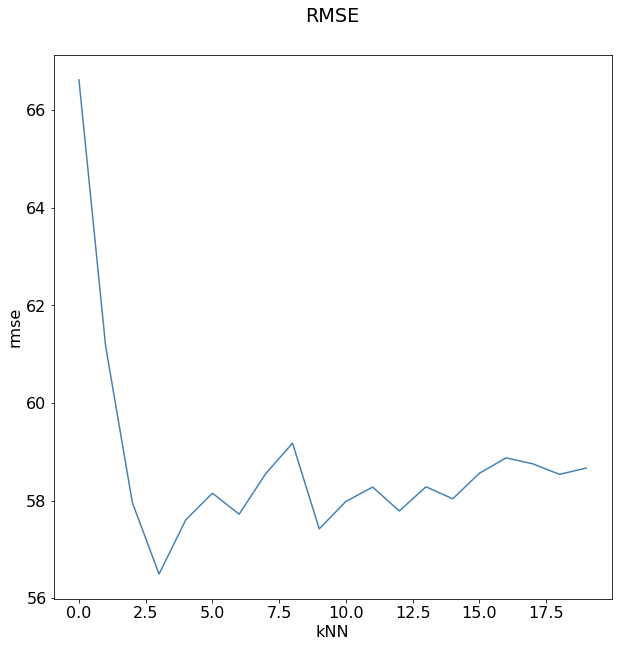

In [ ]:
#Plotting a line graph to show rmse value
plt.figure(figsize=(10,10))
plt.plot(rmse.index, rmse.rmse, color = "steelblue", label = 'rmse')
plt.xlabel('kNN')
plt.ylabel('rmse')
plt.title('RMSE', y=1.05)
plt.show()

In [ ]:
#checking the model based on n_neighbors with the lowest rmse value
reg = KNeighborsRegressor(n_neighbors=6)
reg.fit(X, Y)
print('All Data Score: ' + str(reg.score(X, Y)))
print('All Training Data Score: ' + str(reg.score(X_train, Y_train)))



All Data Score: 0.6501028899141487
All Training Data Score: 0.6837053899573672


reference: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

# kNN Recommender and Prediction

In [ ]:
counties = dfev.loc[:, ['Area_Name', 'EV_Number'] ]
counties.head()

,Area_Name,EV_Number
0,Autauga County,0
1,Baldwin County,0
2,Barbour County,0
3,Bibb County,0
4,Blount County,0


In [ ]:
features = dfev.loc[:, ['Population', 'Median_Household_Income',
       'Avg_Commute_Time', 'Median_Real_Estate', 'Married_15_34',
       'Married_35_64', 'EV_Number', 'Gas_Price', 'Avg_Violent_Crime',
       'Number_of_Drive_Alone', 'Cost_Index']]

In [ ]:
from scipy.sparse import csr_matrix
match_features = csr_matrix(features)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
model_knn = NearestNeighbors(algorithm='brute', n_neighbors=6)
model_knn.fit(match_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

Modeling

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def search(county, state_code, n_recommendation):
  model_knn.fit(match_features)

#[2] = the index value
  id = process.extractOne(county, counties['Area_Name'])[2]
  print('Selected County: ', counties['Area_Name'][id])
  id2 = process.extractOne(state_code, dfev['State'])[2]
  print('Searching...... \n')

#n + 1 = because we need to eliminate the first row
  distance, indexes = model_knn.kneighbors(match_features[id], n_neighbors = n_recommendation+1)

  for i in indexes:
    county = dfev.iloc[i]['Area_Name']
    state = dfev.iloc[i]['State']
    ev = dfev.iloc[i]['EV_Number']
  
  county = pd.DataFrame(county)
  state = pd.DataFrame(state)
  ev = pd.DataFrame(ev)

  county_ev = pd.concat((county, state, ev), axis=1)
  print('Based on the features of ' + str(counties['Area_Name'][id])+
        ' (' + str(dfev['State'][id])+')' +', ' 
        + 'the predicted number of EV charging stations that a county should have is approximately ' + 
        str(round(county_ev['EV_Number'].mean(),0)) +'\n')

  print('The closest counties to '+str(counties['Area_Name'][id]) +' are:')
  #Excluding the selected county or the first row
  return county_ev[1:]


search('san Diego', 'Ca', 3)

Selected County:  San Diego County
Searching...... 

Based on the features of San Diego County (CA), the predicted number of EV charging stations that a county should have is approximately 561.0

The closest counties to San Diego County are:


,Area_Name,State,EV_Number
215,Orange County,CA,843
362,Miami-Dade County,FL,344
2571,Dallas County,TX,294
